### Student Information
Name: Cedric Cyril CHAUVOT

Student ID: X1140010

GitHub ID: CedricCVT

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here

In [2]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap


import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Step X

In [82]:
# Import of the new dataset with pandas built in function to import csv
df = pd.read_csv('Reddit-stock-sentiment.csv')

# Display the columns
print(df.columns)

#display the first 5 lines
df.head()


Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didnât say thank you.,0.000000,0.000000,0.0,[],-1.0


In [83]:
'''
- we are just going to keep the text, and the label. (we assume we can skip the title as more data will be in the text, and that sonetimes the title of reddit post can be ironic)
- we are going to add a column "label_name" for more readable plots. ("label_name" values can be "neutral","positive","negative", whether the label is 0, 1 or -1)
'''
df=df[['text', 'label']]

# Mapping and creating the "label_name" column :
label_map = {
    1: 'positive',
    -1: 'negative',
    0: 'neutral'
}
df['label_name'] = df['label'].map(label_map)

df.head()

,text,label,label_name
0,Calls on retards,-1.0,negative
1,Stunt as in like why did they even make a big ...,0.0,neutral
2,Seeing lots of red in the ticker.,0.0,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive
4,He didnât say thank you.,-1.0,negative


In [84]:
# checking for null values
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [85]:
# No null value in text or label, what a perfect world !

# checking for duplicated values :
sum(df.duplicated()), len(df)

(23, 847)

In [86]:
# There are 23 duplicated values (so same text & label) out of 847 lines. We thus drop the 23 duplicates :

df.drop_duplicates(keep=False, inplace=True)

In [87]:
sum(df.duplicated()), len(df) # now have 0 duplicates

(0, 813)

label_name
neutral     391
negative    315
positive    107
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='label_name'>

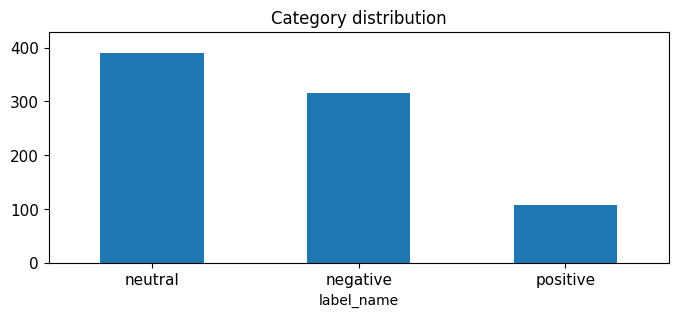

In [88]:
print(df.label_name.value_counts())

# plot barchart for df
df.label_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, df.label_name.value_counts().max()*1.1],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### Here, we observe that most of the data is neutral (~50%), and we have about 3 times more data with negative label than positive label (~13% vs ~37%, welcome to social medias !)
This means we might have to sample to get equivalent proportions of the 3 labels (in order to avoid a negative label bias)
However if we proceed, it means we have to keep the 107 positive labels, and randomly pick 107 neutral and 107 negative, thus dropping 492 records (=half the total dataset, probably too much) but for the sake of practicing let's still create a sampled dataframe !!

label_name
negative    107
neutral     107
positive    107
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='label_name'>

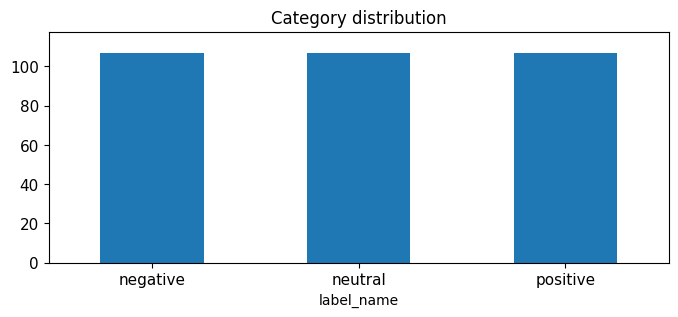

In [89]:
# Creating an equally sampled dataframe
df_sampled = df.groupby('label').sample(n=107, random_state=42)

print(df_sampled.label_name.value_counts())

# plot barchart for df_sampled
df_sampled.label_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, df_sampled.label_name.value_counts().max()*1.1],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### Exercise 8 
Comparing the original dataset vs the sampled one

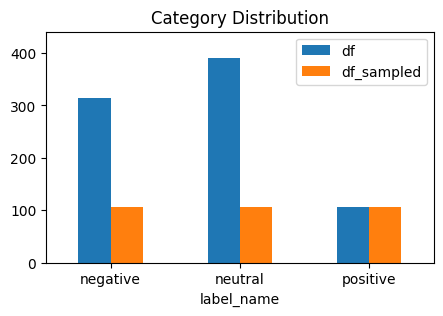

In [90]:
counts = pd.DataFrame({ 'df': df.label_name.value_counts(), 'df_sampled':df_sampled.label_name.value_counts() })

counts.plot(kind='bar', figsize=(5, 3), rot=0, fontsize=10, title='Category Distribution')
plt.ylim(0, counts.max().max() + 50)
plt.show()



#### Feature Creation

In [91]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [92]:

df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

df[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [93]:
# showing the new column "unigrams" of the df :
df.head()

,text,label,label_name,unigrams
0,Calls on retards,-1.0,negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0.0,neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,He didnât say thank you.,-1.0,negative,"[He, didnât, say, thank, you, .]"


### 5.3 Feature subset selection

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (np.int32(0), np.int32(698))	1
  (np.int32(0), np.int32(2718))	1
  (np.int32(0), np.int32(3259))	1


### **>>> Exercise 9:**

In [95]:
analyze = count_vect.build_analyzer()
analyze(df.text[1]) 

#NB : I printed the 2nd one (index 1) because the first one containd a politically-incorrect word

['stunt',
 'as',
 'in',
 'like',
 'why',
 'did',
 'they',
 'even',
 'make',
 'big',
 'deal',
 'about',
 'starting',
 'it',
 'in',
 'the',
 'first',
 'place',
 'no',
 'company',
 'should',
 'ever',
 'talk',
 'about',
 'politics',
 'ever']

In [17]:
df_counts.shape

(813, 4313)

In [18]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### Exercice 10

Above, we can see that the only non-zero value is the 4th document, and has a value of 3 in df_counts. Let's find it :

In [19]:

fourth_doc_df_count=df_counts[0:5, 0:100].toarray()[3] # we want to explore the fourth document (the 4rd line of the df_count matrix)

matrix_elements_non_zero_in_fourth_doc = [] # list of our elements with value >= 1 in df_count
for k in range(0,100): 
    if fourth_doc_df_count[k] >= 1 : # we look at the X_counts matrix to catch every element ==1
        matrix_elements_non_zero_in_fourth_doc.append(count_vect.get_feature_names_out()[k]) # we addd them to the list when their value in the df_count matrix is >= to 1

print(matrix_elements_non_zero_in_fourth_doc[0]) # we print the 1st value that has a count >=1 in the df_count matrix 

116


### Exercice 11

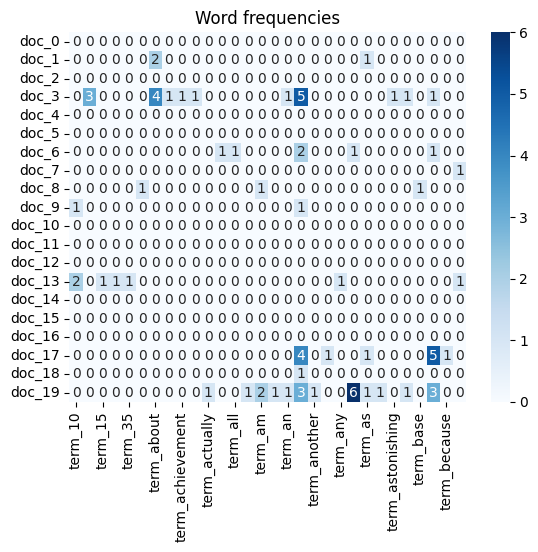

In [20]:
import seaborn as sns

'''
We are going to remove every term who doesnt appear in any of the chosen documents
'''

#chose docs and number of terms
n_doc = 20
n_terms = 30

doc_names = ["doc_"+ str(i) for i in range(n_doc)]
frequency = df_counts[0:n_doc, :].toarray()

# find words that appear at least once
words_that_appear = np.where(frequency.sum(axis=0)>0)[0]
top_words_idx = words_that_appear[:n_terms]

# get word names and data
top_words = ["term_"+str(count_vect.get_feature_names_out()[i]) for i in top_words_idx]
top_word_data = frequency[:, top_words_idx]

#create df for heatmap and plot
df_heatmap = pd.DataFrame(top_word_data, columns=top_words, index=doc_names)
sns.heatmap(df_heatmap, cmap="Blues", annot=True)
plt.title("Word frequencies")
plt.show()

### 5.4 Attribute Transformation / Aggregation

In [21]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [22]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [23]:
# lets check the first value 
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [24]:
term_frequencies[0] #sum of first term: 00
#    =4

np.int64(4)

C:\Users\User\AppData\Local\Temp\ipykernel_24964\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


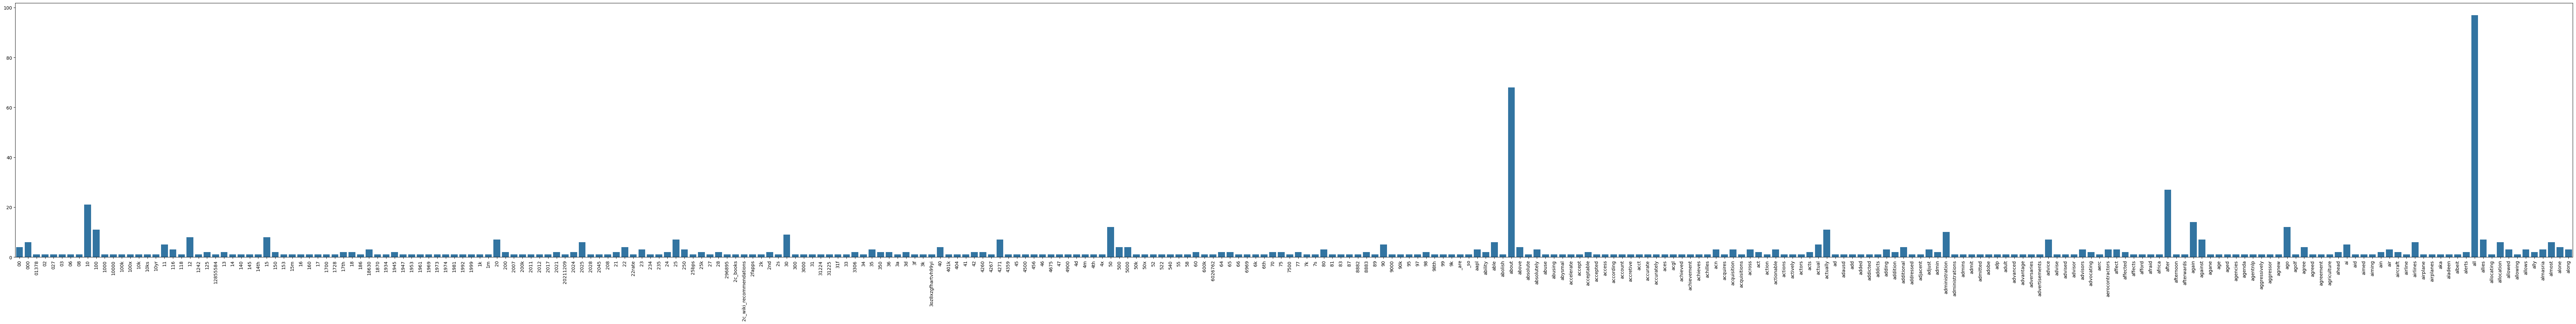

In [25]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 12 (take home):**

In [26]:
import plotly.express as pyex

# Create DataFrame for Plotly
n = 100
df1 = pd.DataFrame({ 'term': count_vect.get_feature_names_out()[:n], 'frequency': term_frequencies[:n]})

#plot with plotly
fig = pyex.bar(df1, 
             x='frequency', 
             y='term',
             title='Frequency of the first 100 terms (interactive : the term is displayed when you put your mouse!!)',
             color='frequency',
             color_continuous_scale='viridis') 

fig.show()

### >>> **Exercise 13 (take home):** 

In [27]:
n = 10 # we just changed the value of n
df1 = pd.DataFrame({ 'term': count_vect.get_feature_names_out()[:n], 'frequency': term_frequencies[:n]})

#plot with plotly
fig = pyex.bar(df1, 
             x='frequency', 
             y='term',
             title='Frequency of the first 10 terms (interactive : the term is displayed when you put your mouse!!)',
             color='frequency',
             color_continuous_scale='viridis') 

fig.show()

### >>> **Exercise 14 (take home):** 

In [28]:
# Answer here
n=100 # how many terms we want to display

# lets create a sorted dataframe
df2 = pd.DataFrame({ 'term': count_vect.get_feature_names_out(), 'frequency': term_frequencies})
df2_sorted = df2.sort_values('frequency', ascending=False).head(n)

# plot
fig = pyex.bar(df2_sorted, 
                         x='term', 
                         y='frequency', 
                         title='Long tail of the terms',
                         color='frequency',
                         color_continuous_scale='viridis')
fig.show()

In [29]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\User\AppData\Local\Temp\ipykernel_24964\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



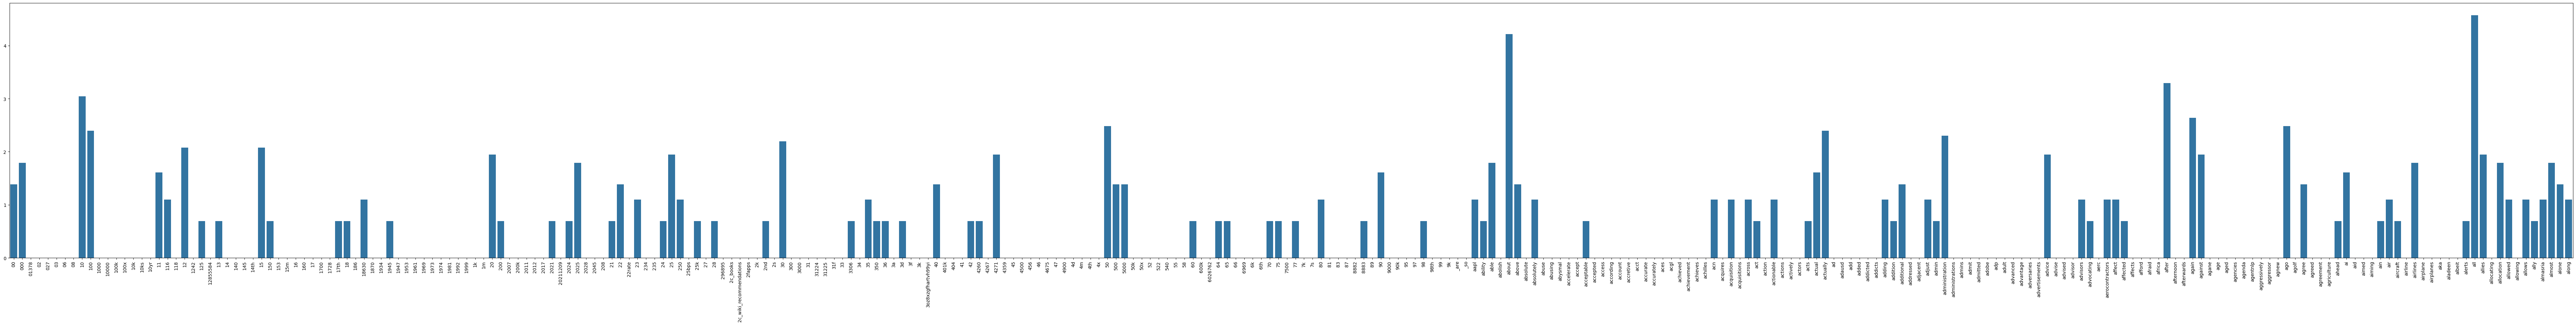

In [30]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 15 (take home):** 

In [31]:
# Answer here

n=100 # how many terms we want to display
df3 = pd.DataFrame({ 'term': count_vect.get_feature_names_out(), 'log of frequency': term_frequencies_log})
df3_sorted = df3.sort_values('log of frequency', ascending=False).head(n)

# One-line plot
fig = pyex.bar(df3_sorted, 
                         x='term', 
                         y='log of frequency', 
                         title='Long tail of the terms',
                         color='log of frequency',
                         color_continuous_scale='viridis')
fig.show()

'''
we can observe that :
- the y scale has been reduced : from 0-30k to 0-10, 
    - Makes it easier for the mind to compare
- the arithmetic difference between the values are now manageable : now, the smaller values are not graphically shrinked anymore into oblivion because of the big values.
    - We can thus observe the long tail in more details
'''

'\nwe can observe that :\n- the y scale has been reduced : from 0-30k to 0-10, \n    - Makes it easier for the mind to compare\n- the arithmetic difference between the values are now manageable : now, the smaller values are not graphically shrinked anymore into oblivion because of the big values.\n    - We can thus observe the long tail in more details\n'

### New meaningful visualizations on the new dataset :

In [32]:
'''
New viz : the words that have the highest label proportions for each label value, and that have multiple apparitions (to avoid 1-hit-wonder irrevelant features)
Lets create a new dataset who will have 4 columns : token, proportion of negative labels of the token, of neutral, and of positive
'''

all_tokens = df['unigrams']

# we create new dataframe with tokens and labels proportionns
exploded_data = []
for i, row in df.iterrows():
    for token in row['unigrams']:
        exploded_data.append({
            'token': token,
            'label': row['label']  
        })

exploded_df = pd.DataFrame(exploded_data)

# calculate proportions for each token
result = exploded_df.groupby('token')['label'].value_counts(normalize=True).unstack(fill_value=0)

# Clean up to get exactly 4 columns
result = result.reset_index()
result.columns = ['token', 'negative', 'neutral', 'positive'] 

print(result)

     token  negative   neutral  positive
0        !  0.426471  0.411765  0.161765
1        #  0.264151  0.698113  0.037736
2        $  0.075949  0.873418  0.050633
3        %  0.239316  0.589744  0.170940
4        &  0.128205  0.666667  0.205128
...    ...       ...       ...       ...
5093     ‘  0.333333  0.666667  0.000000
5094     ’  0.474654  0.400922  0.124424
5095     “  0.413793  0.482759  0.103448
5096     ”  0.444444  0.444444  0.111111
5097    €5  0.000000  0.000000  1.000000

[5098 rows x 4 columns]


In [33]:
# to plot 
result['apparitions'] = result['token'].map(exploded_df.groupby('token').size())

# Filter and display
filtered = result[result['apparitions'] > 10]

for label in ['positive', 'negative', 'neutral']:
    print(f"TOP 10 {label.upper()} TOKENS (>10 apparitions)")
    top_tokens = filtered.nlargest(10, label)[['token', label, 'apparitions']]
    print(top_tokens)
    print()

TOP 10 POSITIVE TOKENS (>10 apparitions)
           token  positive  apparitions
4625  technology  0.916667           12
3147    industry  0.416667           12
2008       calls  0.363636           11
246            :  0.355932           59
4346      silver  0.315789           19
2893        good  0.297297           37
2449       doing  0.290323           31
906         Just  0.285714           14
1702        also  0.285714           21
3375     looking  0.285714           14

TOP 10 NEGATIVE TOKENS (>10 apparitions)
          token  negative  apparitions
3870  president  0.769231           13
3814      point  0.764706           17
3018        his  0.755556           45
4733      trade  0.750000           20
2512    economy  0.739130           23
4304       shit  0.733333           15
2606       ever  0.727273           11
1566         Xi  0.722222           18
4919      wants  0.722222           18
789          He  0.718750           32

TOP 10 NEUTRAL TOKENS (>10 apparitions)
       

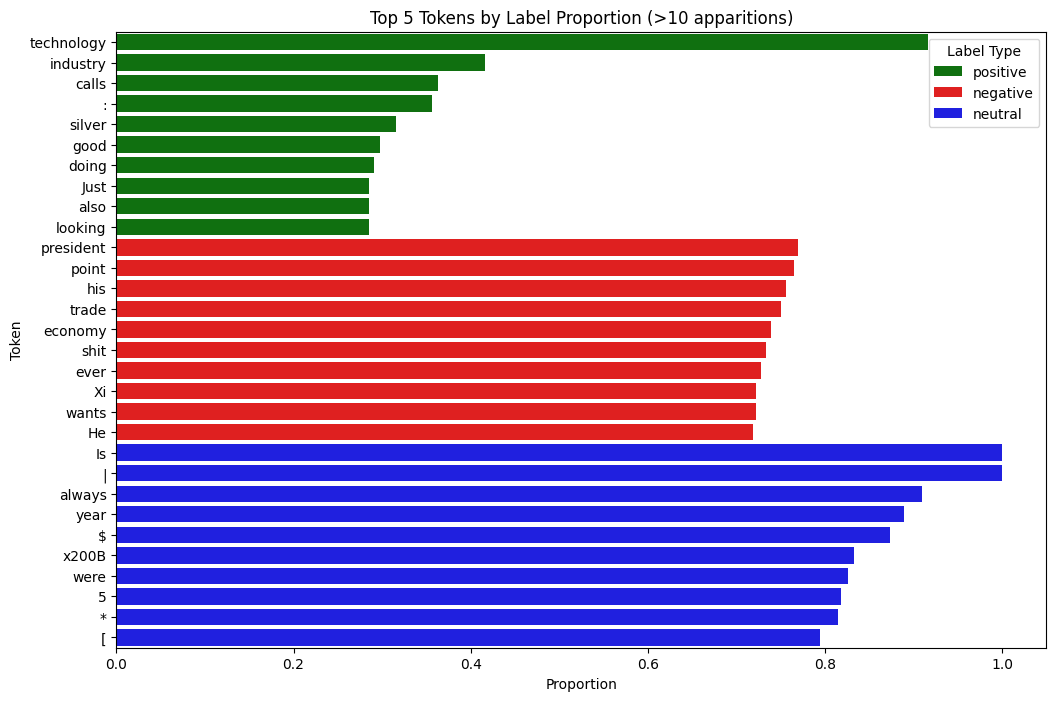

In [34]:
# data in order to plot more elegantly with seaborn
plot_data = []
for label in ['positive', 'negative', 'neutral']:
    top_tokens = filtered.nlargest(10, label)[['token', label]]
    top_tokens['label_type'] = label
    top_tokens = top_tokens.rename(columns={label: 'proportion'})
    plot_data.append(top_tokens)

combined_data = pd.concat(plot_data)

# combined plot
plt.figure(figsize=(12, 8))
sns.barplot(data=combined_data, x='proportion', y='token', hue='label_type', 
            palette={'positive': 'green', 'negative': 'red', 'neutral': 'blue'})
plt.title('Top 5 Tokens by Label Proportion (>10 apparitions)')
plt.xlabel('Proportion')
plt.ylabel('Token')
plt.legend(title='Label Type')
plt.show()

# Phase 2

In [320]:
### Begin Assignment Here

### Phase 2 : 2. 
same process from the DM2025-Lab1-Master on **the new dataset** for phase 2, starting from Finding frequent pattern

In [96]:
# NB :We reuse our new dataset from Phase 1 ('Reddit-stock-sentiment.csv'), which we modified in phase 1 to only keep 'text', 'label', 'label_name' and 'unigrams' as follows :
df.head()

,text,label,label_name,unigrams
0,Calls on retards,-1.0,negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0.0,neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,He didnât say thank you.,-1.0,negative,"[He, didnât, say, thank, you, .]"


###  5.4.2 Finding frequent patterns

Let's convert text data into transactional form and mine frequent patterns from it

In [97]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df['label_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['label_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

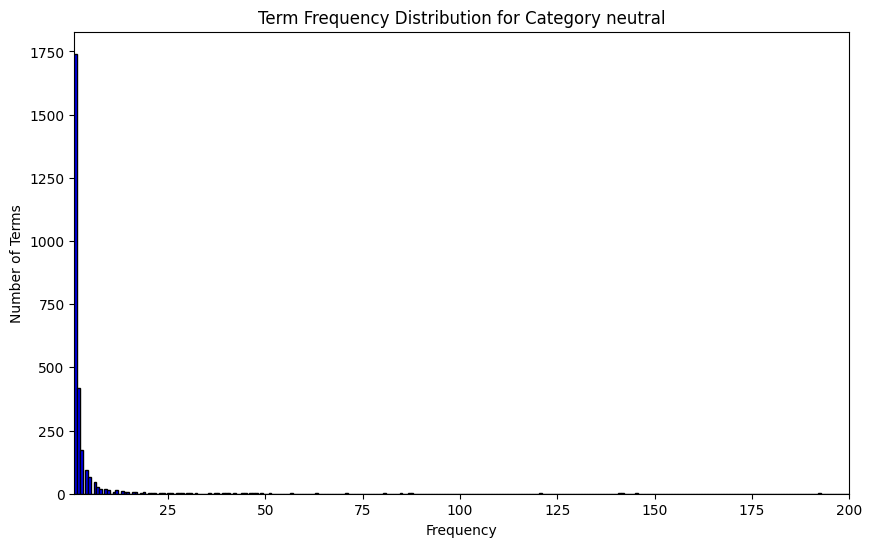

In [98]:
 # Sum over all documents to get total frequency for each word
category_number=1 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=500, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [46]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category negative we filter the following words:
Bottom 1.0% words: 
youtube       1
500           1
program       1
60            1
65            1
6k            1
6th           1
77            1
7s            1
programs      1
projection    1
98            1
9k            1
_are          1
aapl          1
50            1
yourselves    1
2k            1
2s            1
30            1
3000          1
dtype: int64
Top 5.0% words: 
these         11
dollar        11
everyone      12
could         12
literally     12
            ... 
it           147
is           178
and          193
to           231
the          409
Length: 109, dtype: int64

For category neutral we filter the following words:
Bottom 1.0% words: 
zone          1
rapidly       1
rather        1
rational      1
rationally    1
razor         1
rbdx          1
rddt          1
reach         1
react         1
reacts        1
realizes      1
yoyo          1
reasoning     1
zgld          1
reasons       1
1242          1
re

,000,02,03,10,100,1000,10000,11,12,13,...,ya,yea,yeah,year,years,yet,yields,yippee,yo,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [ ]:
''' 
Summary of what we observed :

0. category negative  :
    Bottom 1% words : 500, 65, 6k, youtube ...
    Top 5% words : it, is, and, to, the, dollar, litterally ...

1. category neutral :
    Bottom 1% : yoyo, 1242, zgld, 027 ...
    Top 5% : is, it, and, to , the ,high, down ...

2. category positive :
    Bottom 1% : 24,25,4x,restaurant ...
    Top 5% : it, in, is, and, to, the ...

    
Similarities :
    - We notice that for every category, the top 5% is very similar ('stop words' like the, of, to...)
    - For each cagtegory, the bottom 1% contains a lot of IDs/numbers (1242, 027...), non-existing or very uncommon words (4x, zgld...)

Differences :
    - For the top 5%, each category has some specific words related to the category. e.g :
        sci.med : genetic
        soc.religion.christian : preeminence 
        alt.atheism : jewish 
    We notice some could be useful and could be considered as patterns ! Showing the importance of carefully chosing the value of the threshold.

'''

In [47]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


In [48]:
# Given code for fixing UTF8 problem I had
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

Database size (total no of transactions) : 315
Number of items : 2062
Minimum Transaction Size : 1
Average Transaction Size : 11.82857142857143
Maximum Transaction Size : 139
Standard Deviation Transaction Size : 13.325085884608757
Variance in Transaction Sizes : 178.1233848953594
Sparsity : 0.9942635444090342


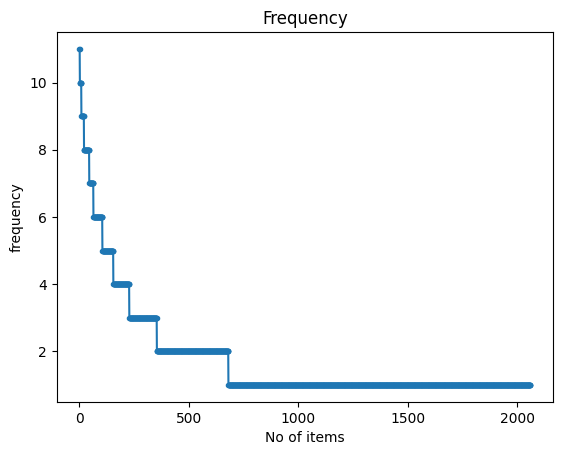

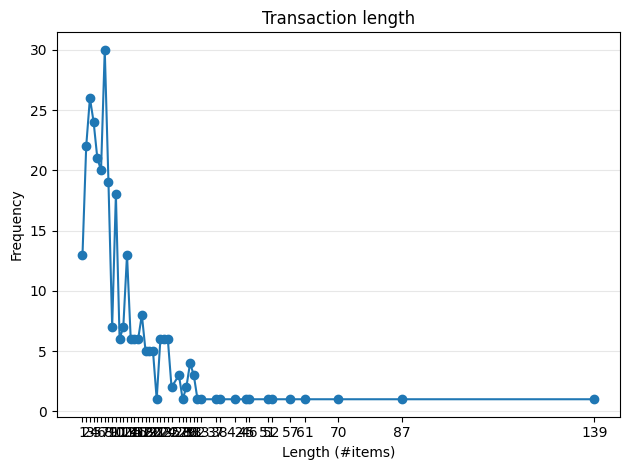

In [49]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_negative.csv')
obj.run()
obj.printStats()
obj.plotGraphs()


Database size (total no of transactions) : 383
Number of items : 2543
Minimum Transaction Size : 1
Average Transaction Size : 10.911227154046998
Maximum Transaction Size : 201
Standard Deviation Transaction Size : 18.642506087432064
Variance in Transaction Sizes : 348.4528317362241
Sparsity : 0.9957093090231824


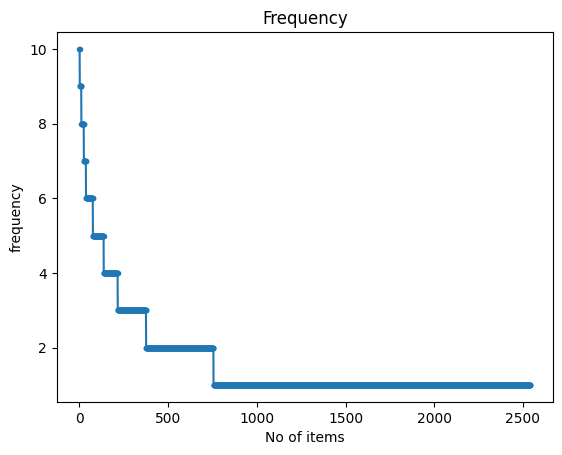

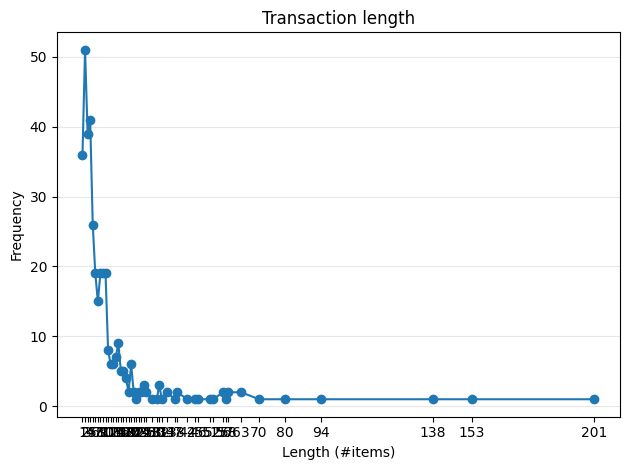

In [50]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_neutral.csv')
obj.run()
obj.printStats()
obj.plotGraphs()


Database size (total no of transactions) : 106
Number of items : 1099
Minimum Transaction Size : 1
Average Transaction Size : 14.481132075471699
Maximum Transaction Size : 92
Standard Deviation Transaction Size : 16.947327463419338
Variance in Transaction Sizes : 289.94725965858044
Sparsity : 0.9868233557093069


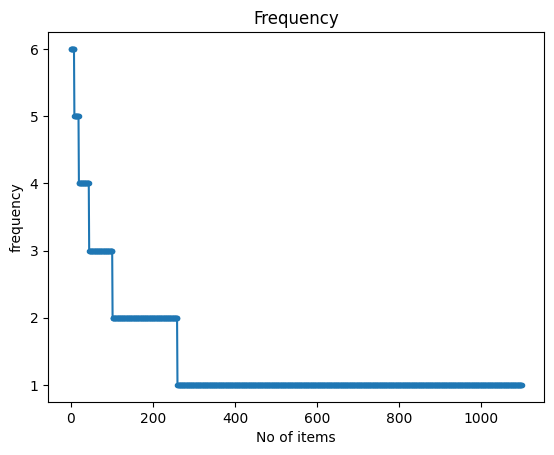

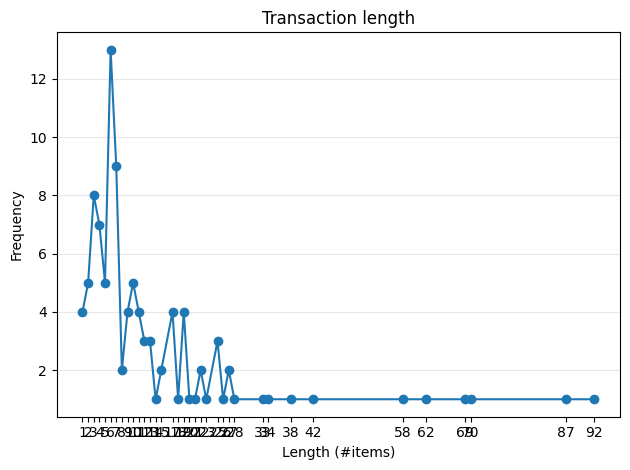

In [51]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_positive.csv')
obj.run()
obj.printStats()
obj.plotGraphs()


After observing the transaction length and the frequency, we can chose a **minSup of 3**, so we can ignore values with too few support while not ignoring everything

In [67]:
# FOR NEGATIVE :
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3
obj1 = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_negative= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 400
Runtime: 0.011724710464477539


In [68]:
# FOR NEGATIVE :
obj1.save('freq_patterns_negative_minSup3.txt') #save the patterns
frequentPatternsDF_negative

,Patterns,Support
0,personally,3
1,starting,3
2,honestly,3
3,exactly,3
4,square,3
...,...,...
395,should,10
396,bad,10
397,again,10
398,already,11


In [69]:
# FOR NEUTRAL :
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3
obj2 = alg.FPGrowth(iFile='td_freq_db_neutral.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_neutral= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 416
Runtime: 0.007422447204589844


In [70]:
# FOR NEUTRAL :
obj2.save('freq_patterns_neutral_minSup3.txt') #save the patterns
frequentPatternsDF_neutral

,Patterns,Support
0,politics,3
1,seeing,3
2,trap,3
3,word,3
4,write,3
...,...,...
411,ll,9
412,am,9
413,few,9
414,let,10


In [71]:
# FOR POSITIVE :
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3
obj3 = alg.FPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_positive= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_positive))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 110
Runtime: 0.005616903305053711


In [72]:
# FOR NEUTRAL :
obj3.save('freq_patterns_positive_minSup3.txt') #save the patterns
frequentPatternsDF_positive

,Patterns,Support
0,come,3
1,electric,3
2,electric\tyour,3
3,ll,3
4,main,3
...,...,...
105,them,6
106,out,6
107,see,6
108,economy,6


Let's analyze unique patterns :

In [99]:
# NB : renamed the variables df and dfs (from de Phase 2 Master Code) into daf and dafs because df was already the name of our new dataset...

import pandas as pd

#We group together all of the dataframes related to our found patterns
dafs = [frequentPatternsDF_positive, frequentPatternsDF_neutral, frequentPatternsDF_negative]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for daf in dafs:
    for pattern in daf['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(daf) for daf in dafs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for daf in dafs:
    filtered_df = daf[daf['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

         Patterns  Support
322        always       10
555           off        9
558          week        9
321        reddit        9
320          said        9
..            ...      ...
6           green        3
5            tldr        3
4    points\tmain        3
3          points        3
2            main        3

[561 rows x 2 columns]
Number of patterns discarded: 365


Now we can create an augmented_df, enhanced with the unique patterns we discovered :

In [102]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_text'] = df['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,still,spy,worth,trend,perfectly,green,tldr,points\tmain,points,main
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'negative' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**,


 like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance. For this you can find the following google collabs for reference provided by their github repository here: [FAE Top-K](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/topk/FAE.ipynb) and [MaxFPGrowth](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/maximal/MaxFPGrowth.ipynb)

 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
  algorithm  minSup  patterns   runtime     memory
0       FAE     100       100  0.011132  492085248
1       FAE     300       300  0.028712  492691456
2       FAE     600       600  0.273475  492691456
FAE with k value 100 :
          Patterns  Support
0          already       11
1            after       11
2           things       10
3             here       10
4              day       10
..             ...      ...
95            face        6
96              ll        6
97            went        6
98  administration        6
99           every        6

[100 rows x 2 columns]
FAE with k value 300 :
      Patterns  Support
0      already       11
1        after       11
2       things       10
3         here       10
4          day       10
..         ...      ...
295

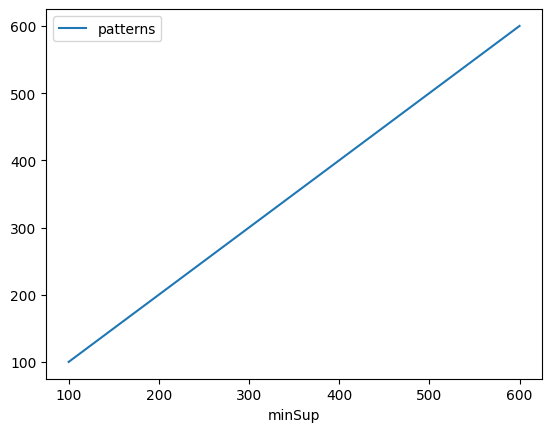

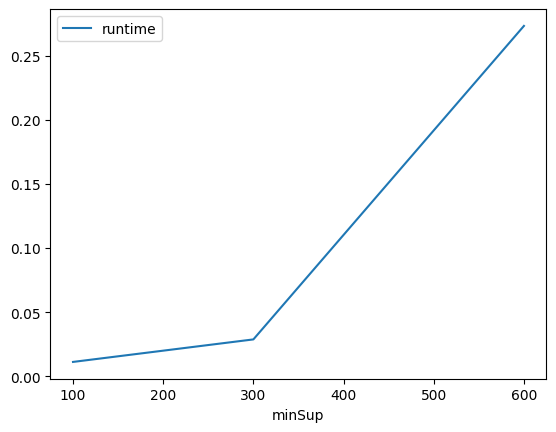

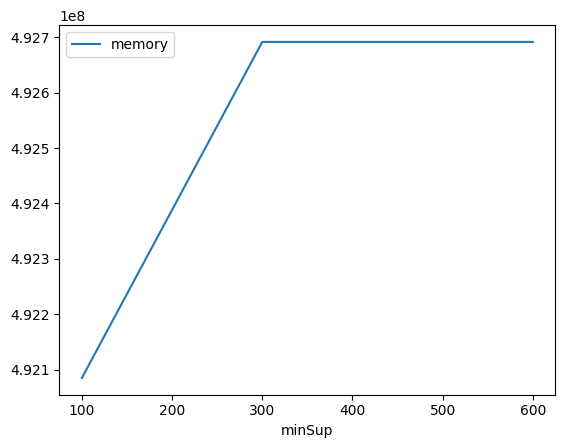

In [110]:
# Answer Here 
# NB : inspired from the given repository !
''' 
FAE Top-K algorithm :
(MaxFPGrowth in next code cell)
'''

from PAMI.frequentPattern.topk import FAE  as alg
#from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt
#NB : not working...

inputFile = 'td_freq_db_negative.csv'
minimumSupportCountList = [100, 300, 600]
seperator='\t'

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])

algorithm = 'FAE'  #specify the algorithm name
FAE_patterns_dic={} # Dictionnary containing the patterns
for minSupCount in minimumSupportCountList:
    obj = alg.FAE(inputFile, k=minSupCount, sep=seperator)
    obj.mine()

    FAE_patterns_dic[f"FAE_{minSupCount}"]= obj.getPatternsAsDataFrame()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

print(result)

result.plot(x='minSup', y='patterns', kind='line')
result.plot(x='minSup', y='runtime', kind='line')
result.plot(x='minSup', y='memory', kind='line')

for minSupCount in minimumSupportCountList:
    print(f"FAE with k value {minSupCount} :")
    print(FAE_patterns_dic[f"FAE_{minSupCount}"])

#ab = plt.plotGraphsFromDataFrame(result)
#ab.plotGraphsFromDataFrame() #drawPlots()

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
     algorithm  minSup  patterns   runtime     memory
0  MaxFPGrowth       3       333  0.017557  498036736
1  MaxFPGrowth       6       105  0.004307  498049024
2  MaxFPGrowth       9        21  0.004294  498053120
Max FP Growth with minimum threshold 3 :
          Patterns  Support
0           being         3
1          leader         3
2        remember         3
3            fair         3
4          beyond         3
..             ...      ...
328           bad        10
329        should        10
330          sure        10
331           day        10
332  already here         3

[333 rows x 2 columns]
Max FP Growth with minimum threshold 6 :
     Patterns  Support
0      gonna         6
1    trading         6
2       lost         

<Axes: xlabel='minSup'>

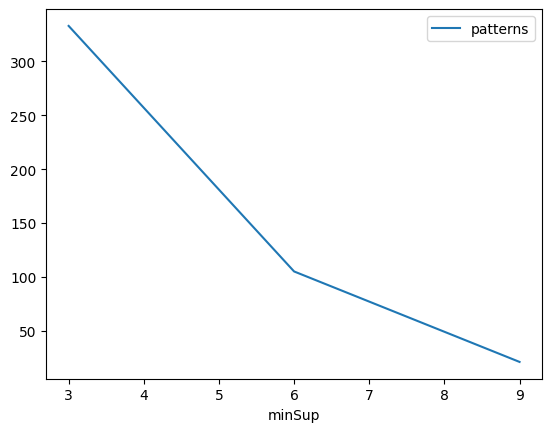

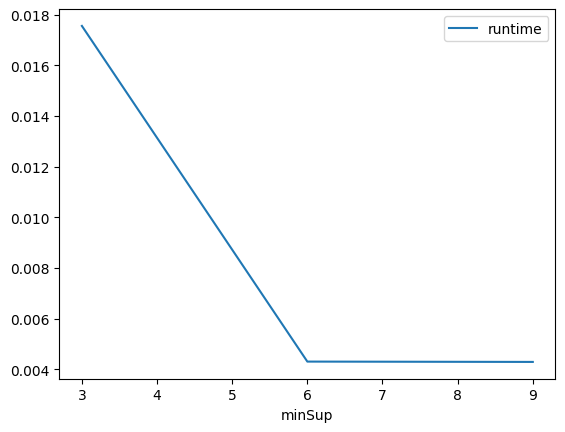

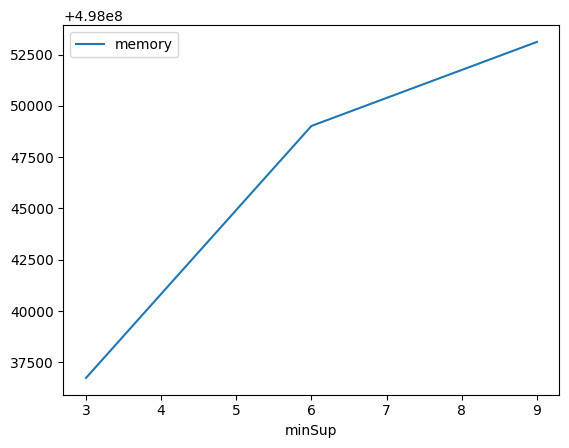

In [111]:
# Answer Here 
''' 
MaxFPGrowth algorithm
(ex17)
'''
#Import the libraries
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg #import the algorithm
import pandas as pd

#Specify the input parameters
inputFile = 'td_freq_db_negative.csv'
seperator='\t'
minimumSupportCountList = [3, 6, 9]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
MaxFPGrowth_patterns_dic={}
for minSupCount in minimumSupportCountList:
    obj = alg.MaxFPGrowth(inputFile, minSup=minSupCount, sep=seperator)
    obj.mine()

    MaxFPGrowth_patterns_dic[f"MaxFPGrowth_{minSupCount}"]= obj.getPatternsAsDataFrame()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['MaxFPGrowth', minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

print(result)

for minSupCount in minimumSupportCountList:
    print(f"Max FP Growth with minimum threshold {minSupCount} :")
    print(MaxFPGrowth_patterns_dic[f"MaxFPGrowth_{minSupCount}"])

result.plot(x='minSup', y='patterns', kind='line')
result.plot(x='minSup', y='runtime', kind='line')
result.plot(x='minSup', y='memory', kind='line')

#Graphs can be improved further by using additional packages, such as plotly and matplotlib

In [113]:
# CONCLUSION OF EX17
''' 
CONCLUSION OF EX 17 : Difference and similarities between MaxFPGrowth & FAE TopK compared to FPGrowth

Patterns : 
    FPGrowth focused on finding high-frequency patterns that were only 1-word long,
    Whereas MaxFPGrowth & FAE TopK focused on the longer patterns, even if they are less frequent than single words.
    - FPGrowth : 400 single-word patterns, support ranging from 3 to 11
    - FAE Top5 : from 100 to 600 patterns found (chosen parameter) with support ranging from 2 to 11
    - MaxFPGrowth : from 21 to 333 patterns found, with support ranging from 3 to 11 (minimum is a parameter)
    

Runtime :
    While FPGrowth only took about ~1 second to execute,
    MaxFPGrowth & FAE TopK took from 2 to 30seconds to execute, so way longer !

'''

' \nCONCLUSION OF EX 17 : Difference and similarities between MaxFPGrowth & FAE TopK compared to FPGrowth\n\nPatterns : \n    FPGrowth focused on finding high-frequency patterns that were only 1-word long,\n    Whereas MaxFPGrowth & FAE TopK focused on the longer patterns, even if they are less frequent than single words.\n    - FPGrowth : 400 single-word patterns, support ranging from 3 to 11\n    - FAE Top5 : from 100 to 600 patterns found (chosen parameter) with support ranging from 2 to 11\n    - MaxFPGrowth : from 21 to 333 patterns found, with support ranging from 3 to 11 (minimum is a parameter)\n    \n\nRuntime :\n    While FPGrowth only took about ~1 second to execute,\n    MaxFPGrowth & FAE TopK took from 2 to 30seconds to execute, so way longer !\n\n'

### 5.5 Dimensionality Reduction

In [114]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
df_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
df_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
df_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [116]:
df_pca_tdm.shape

(813, 2)

In [117]:
df_tsne_tdm.shape

(813, 2)

In [118]:
df_umap_tdm.shape

(813, 2)

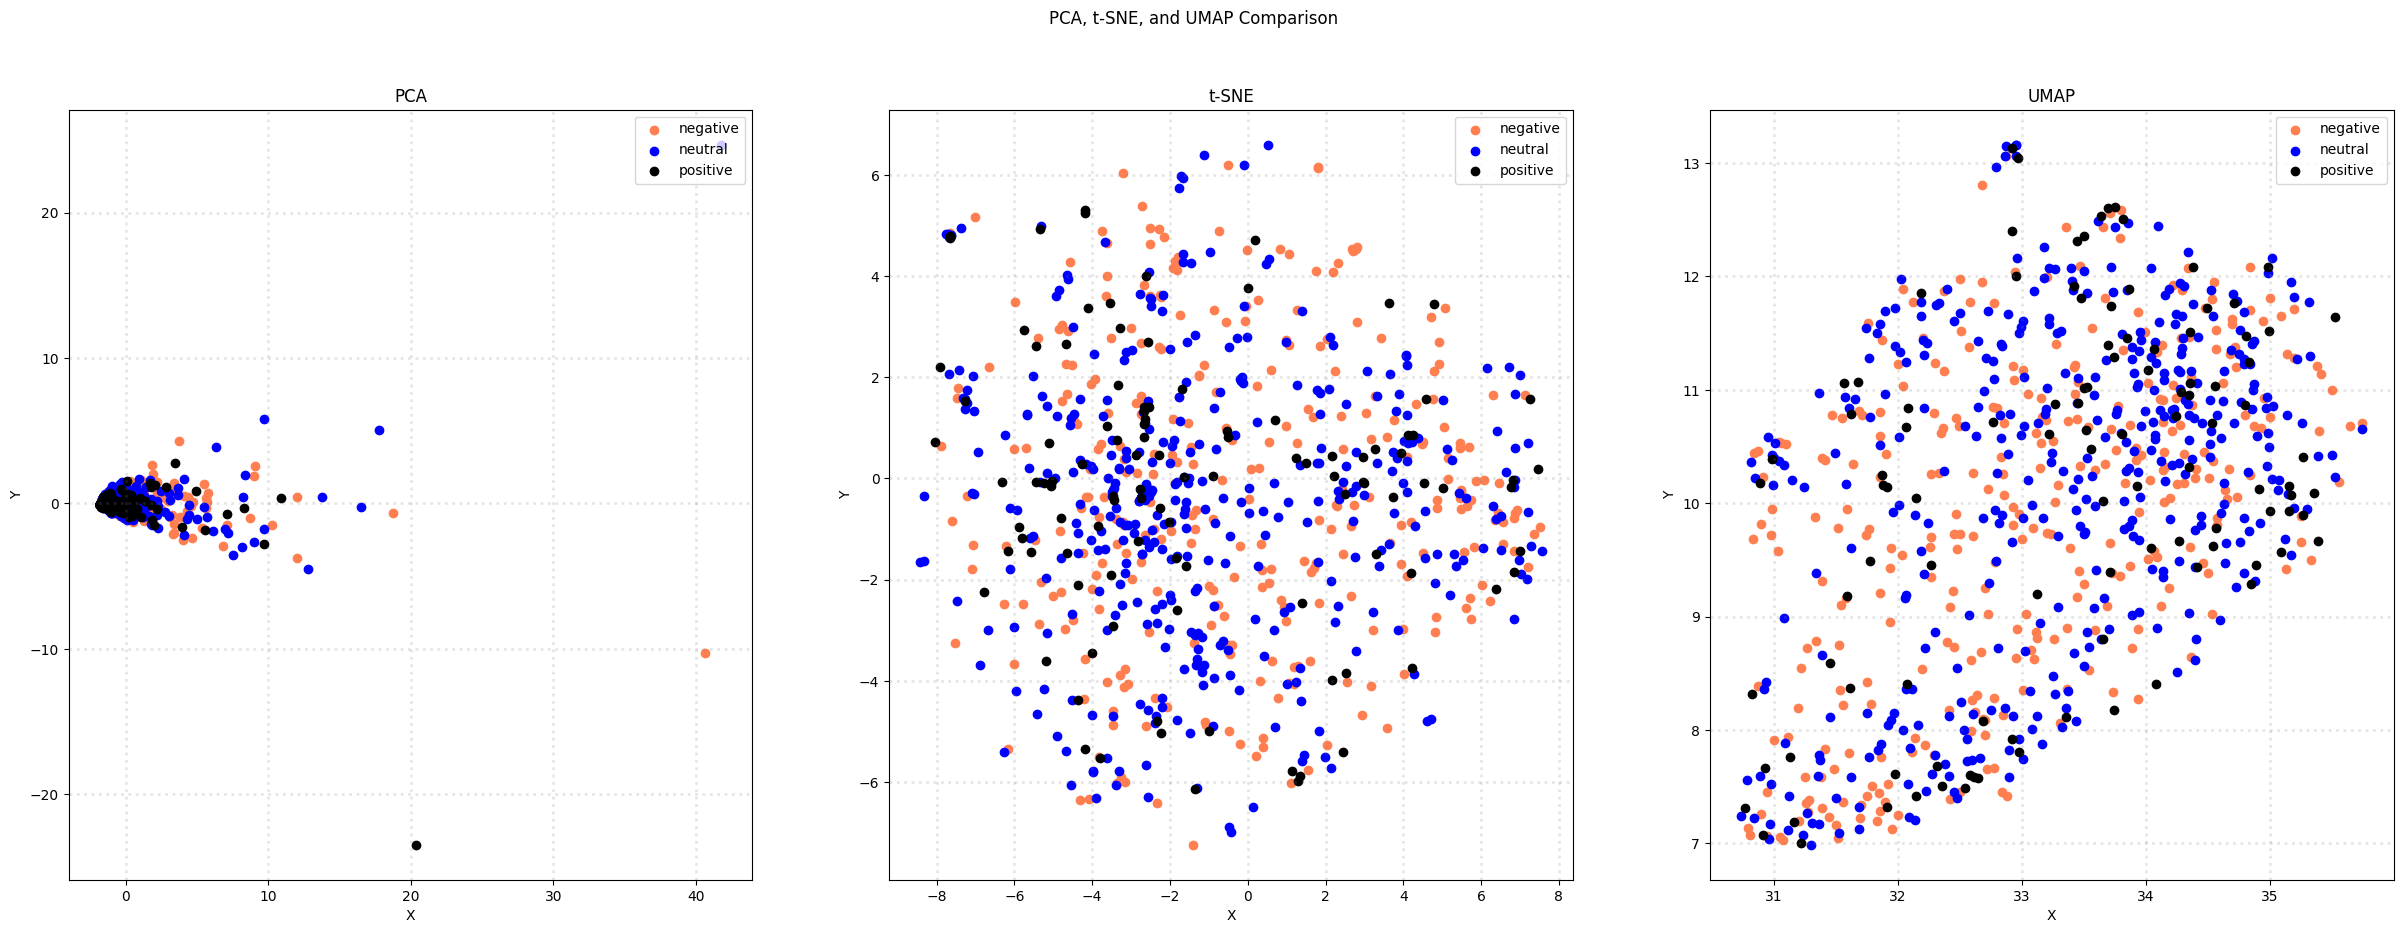

In [120]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df['label_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['label_name'] == category].T[0]
        ys = X_reduced[df['label_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_pca_tdm, 'PCA')
plot_scatter(axes[1], df_tsne_tdm, 't-SNE')
plot_scatter(axes[2], df_umap_tdm, 'UMAP')

plt.show()

Now in 3D :

In [122]:
# 3D :
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data

df_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
df_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
df_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

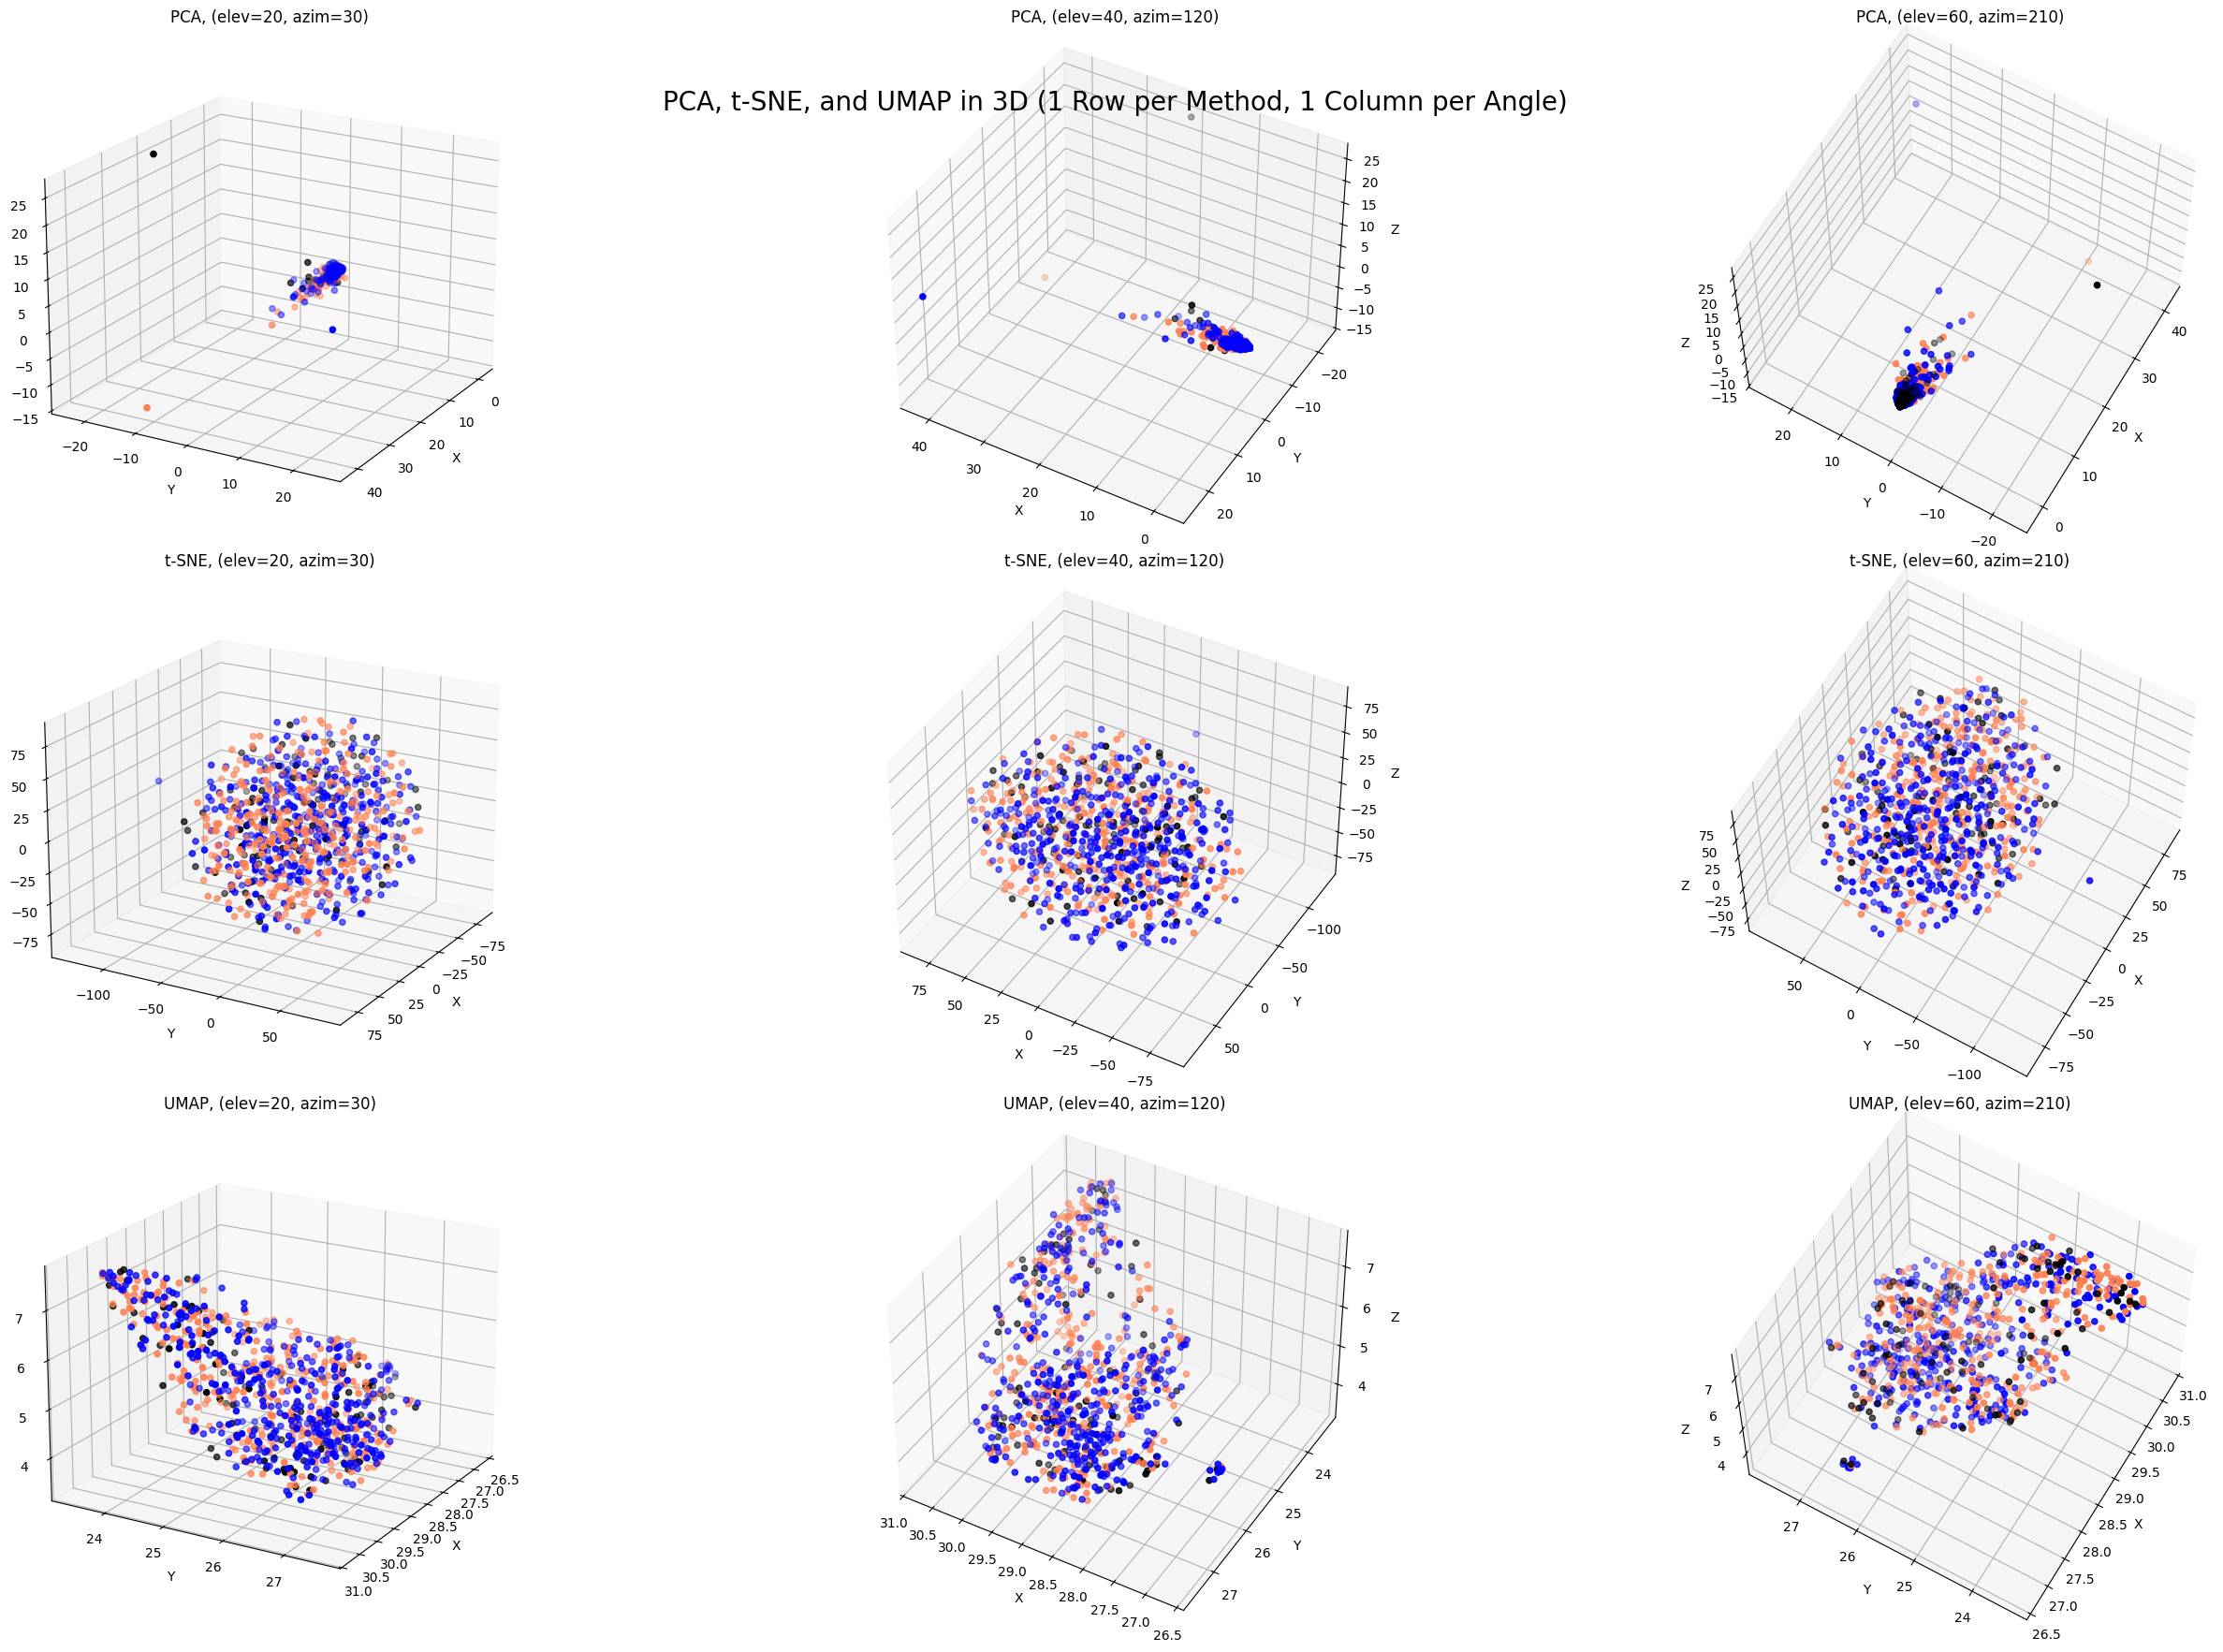

In [124]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

col = ['coral', 'blue', 'black', 'orange']
categories = df['label_name'].unique()

# three viewing angles
elevations = [20, 40, 60]
azimuths = [30, 120, 210]

fig = plt.figure(figsize=(30, 18))
fig.suptitle("PCA, t-SNE, and UMAP in 3D (1 Row per Method, 1 Column per Angle)", fontsize=20, y=0.92)

methods = [ ("PCA", df_pca_aug),("t-SNE", df_tsne_aug),("UMAP", df_umap_aug)]

# We are going to display is as 1 row per method, 1 column per angle
for i, (name_method, data3d) in enumerate(methods): # 3 rows
    for j, (elev, azim) in enumerate(zip(elevations, azimuths)):  # 3 columns
        ax = fig.add_subplot(3, 3, i*3+j+1, projection='3d')
        for c, cat in zip(col, categories):
            pts = data3d[df['label_name'] == cat]
            ax.scatter(pts[:,0], pts[:,1], pts[:,2], c=c, label=cat, s=20)
        ax.view_init(elev=elev, azim=azim)
        ax.set_title(f"{name_method}, (elev={elev}, azim={azim})", fontsize=12)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.grid(True, linestyle=':', alpha=0.3)

plt.tight_layout()
plt.show()


### 5.6 Discretization and Binarization
We are going to binarize the labels

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [126]:
mlb = preprocessing.LabelBinarizer()

In [130]:
mlb.fit(df.label)

LabelBinarizer()

In [131]:
df['bin_label'] = mlb.transform(df['label']).tolist()

In [132]:
df[0:9]

,text,label,label_name,unigrams,tokenized_text,bin_label
0,Calls on retards,-1.0,negative,"[Calls, on, retards]","{on, retards, Calls}","[1, 0, 0]"
1,Stunt as in like why did they even make a big ...,0.0,neutral,"[Stunt, as, in, like, why, did, they, even, ma...","{did, why, like, should, the, politics, in, de...","[0, 1, 0]"
2,Seeing lots of red in the ticker.,0.0,neutral,"[Seeing, lots, of, red, in, the, ticker, .]","{in, the, red, lots, of, ticker., Seeing}","[0, 1, 0]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive,"[Vision, Marine, Technologies, Inc., is, rewri...","{like, shattered, have, world, achieved, the, ...","[0, 0, 1]"
4,He didnât say thank you.,-1.0,negative,"[He, didnât, say, thank, you, .]","{He, you., say, didnât, thank}","[1, 0, 0]"
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,neutral,"[Hoping, to, ejaculate, in, wet, warm, puss, t...","{Hoping, warm, in, to, wish, puss, wet, tonigh...","[0, 1, 0]"
6,Trump will respond to china increasing their t...,-1.0,negative,"[Trump, will, respond, to, china, increasing, ...","{personally, downwards, Trump, china, tariffs....","[1, 0, 0]"
7,Confirmed not a trap. Its been like this for p...,0.0,neutral,"[Confirmed, not, a, trap, ., Its, been, like, ...","{mouth, like, trap., not, have, Confirmed, of,...","[0, 1, 0]"
8,Am I the only one seeing the cup & handle brea...,1.0,positive,"[Am, I, the, only, one, seeing, the, cup, &, h...","{week, &, Third, technicals, high?, base, the,...","[0, 0, 1]"


### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `label_name` column instead. Does it work?

In [133]:
# Answer here

df['bin_label_name'] = mlb.transform(df['label_name']).tolist()

'''
OBSERVATIONS :

It doesnt work ! 
It only generates [0,0,0] lists, which means it understood that there were 3 distincts categories, but maybe it didnt knew in what order was it supposed to put the 1s.
It thus looks like this one hot encoding function works for integers, but not for strings.

'''

df[0:9]




,text,label,label_name,unigrams,tokenized_text,bin_label,bin_label_name
0,Calls on retards,-1.0,negative,"[Calls, on, retards]","{on, retards, Calls}","[1, 0, 0]","[0, 0, 0]"
1,Stunt as in like why did they even make a big ...,0.0,neutral,"[Stunt, as, in, like, why, did, they, even, ma...","{did, why, like, should, the, politics, in, de...","[0, 1, 0]","[0, 0, 0]"
2,Seeing lots of red in the ticker.,0.0,neutral,"[Seeing, lots, of, red, in, the, ticker, .]","{in, the, red, lots, of, ticker., Seeing}","[0, 1, 0]","[0, 0, 0]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive,"[Vision, Marine, Technologies, Inc., is, rewri...","{like, shattered, have, world, achieved, the, ...","[0, 0, 1]","[0, 0, 0]"
4,He didnât say thank you.,-1.0,negative,"[He, didnât, say, thank, you, .]","{He, you., say, didnât, thank}","[1, 0, 0]","[0, 0, 0]"
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,neutral,"[Hoping, to, ejaculate, in, wet, warm, puss, t...","{Hoping, warm, in, to, wish, puss, wet, tonigh...","[0, 1, 0]","[0, 0, 0]"
6,Trump will respond to china increasing their t...,-1.0,negative,"[Trump, will, respond, to, china, increasing, ...","{personally, downwards, Trump, china, tariffs....","[1, 0, 0]","[0, 0, 0]"
7,Confirmed not a trap. Its been like this for p...,0.0,neutral,"[Confirmed, not, a, trap, ., Its, been, like, ...","{mouth, like, trap., not, have, Confirmed, of,...","[0, 1, 0]","[0, 0, 0]"
8,Am I the only one seeing the cup & handle brea...,1.0,positive,"[Am, I, the, only, one, seeing, the, cup, &, h...","{week, &, Third, technicals, high?, base, the,...","[0, 0, 1]","[0, 0, 0]"


# 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [134]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[1]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[10]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[100]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [135]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.']
["It's a copy/paste from a Bloomberg terminal."]
["I think it's actually illegal to say how I feel"]


In [136]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [137]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.072169
Cosine Similarity using count bw 1 and 3: 0.062500
Cosine Similarity using count bw 2 and 3: 0.144338
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_24964\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\User\AppData\Local\Temp\ipykernel_24964\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\User\AppData\Local\Temp\ipykernel_24964\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\User\AppData\Local\Temp\ipykernel_24964\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

### >>> **Exercise 20 (take home):**
Try changing the texts reference for Text 1, Text 2, and Text 3. What do you observe from the Cosine Similarity results of different text references? following the modifications to texts reference, how can the results of the cosine similarity be interpreted?  

In [145]:
#Answer

''' 
Let's chose our text references, text 2 and 3 will be from the same category, while text 1 will be from a different category :
    Text 1 :         df.iloc[0] from negative category
    Text 2 and 3 :   df.iloc[1] and df.iloc[2] from neutral category

We just copy the previous cells, modifying the lines for the new text references :

PS : We obtain the following cosine similarity for texts :
    1 and 2: 0.000000
    1 and 3: 0.200446
    2 and 3: 0.000000

    1 and 1: 1.000000
    2 and 2: 1.000000
    3 and 3: 1.000000

So we have a higher cosine similarity (0.20) when two text are closer (same category:2 and 3, both from neutral category) 
than when two texts are from different categories (comparing 1 and 2 (0.00) or 1 and 3 (0.00) (comparing the similarity between a negative and neutral labelled text)).

However in this new Reddit dataset, the texts are very short, so we have very few data to compare for similarity.

To conclude, a higher cosine similarity (close to 1) seems correlated with higher similarity in the text (and thus category/label).

'''
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[0] # from comp.graphics
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[1] # from sci.med
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[2] # from sci.med
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
#print("Let's take a look at the count vectors:")
#print(document_vector_count_1.todense())
#print(document_vector_count_2.todense())
#print(document_vector_count_3.todense())

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})




Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.200446
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_24964\337525827.py:69: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\User\AppData\Local\Temp\ipykernel_24964\337525827.py:70: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\User\AppData\Local\Temp\ipykernel_24964\337525827.py:71: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\User\AppData\Local\Temp\ipykernel_24964\337525827.py:73: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

# 7. Data Classification
We will implement a Multinomial Naive Bayes, for that we first choose how to split our data, in this case we will follow a typical **70/30 split for the training and test set**. Let's see a comparison of what we obtain when classifying our data without patterns vs our data with the patterns.

In [146]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df[['label', 'label_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['label'], test_size=0.3, random_state=42)

In [147]:
X_train

,00,000,01378,02,027,03,06,08,10,100,...,yourself,yourselves,youtube,youâ,yoyo,yup,zero,zgld,zone,zsil
706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
X_test

,00,000,01378,02,027,03,06,08,10,100,...,yourself,yourselves,youtube,youâ,yoyo,yup,zero,zgld,zone,zsil
255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5450819672131147

Classification Report:
               precision    recall  f1-score   support

    negative     0.5135    0.7835    0.6204        97
     neutral     0.6512    0.4628    0.5411       121
    positive     0.1000    0.0385    0.0556        26

    accuracy                         0.5451       244
   macro avg     0.4216    0.4283    0.4057       244
weighted avg     0.5377    0.5451    0.5209       244



### >>> **Exercise 21 (take home):**

Previously, we performed data augmentation by concatenating the original TDM with the pattern matrix. Use the augmented data to perform classification using Naive Bayes as in the previous steps.

In [154]:
#Answer

''' 
Let's use the augmented dataframe (augmented_df), we just have to replace (tdm_df) by (augmented_df) in the previous codes :
'''

# Create a mapping from numerical labels to category names
category_mapping = dict(df[['label', 'label_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['label'], test_size=0.3, random_state=42) # We put our augmented df here !

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5450819672131147

Classification Report:
               precision    recall  f1-score   support

    negative     0.5135    0.7835    0.6204        97
     neutral     0.6512    0.4628    0.5411       121
    positive     0.1000    0.0385    0.0556        26

    accuracy                         0.5451       244
   macro avg     0.4216    0.4283    0.4057       244
weighted avg     0.5377    0.5451    0.5209       244



### >>> **Exercise 22 (take home):**

What differences can be observed between the results obtained using the original TDM and those obtained using the augmented TDM?

In [162]:
'''
We dont notice any change when we use the augmented_df... maybe the augmentation step wasnt really efficient and the "unique patterns" only lead to an overfitting of our model, 
so not contributing to any upgrade for the test.
'''

'\nWe dont notice any change when we use the augmented_df... maybe the augmentation step wasnt really efficient and the "unique patterns" only lead to an overfitting of our model, \nso not contributing to any upgrade for the test.\n'

### Decision Tree Classifier

In [164]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))


Decision Tree Accuracy (TDM): 0.4713114754098361

Classification Report:
               precision    recall  f1-score   support

    negative     0.4615    0.4330    0.4468        97
     neutral     0.5556    0.5785    0.5668       121
    positive     0.1111    0.1154    0.1132        26

    accuracy                         0.4713       244
   macro avg     0.3761    0.3756    0.3756       244
weighted avg     0.4708    0.4713    0.4708       244



### >>> **Exercise 23 (take home):**

Why do you think the performance of Decision Trees is lower than that of Naive Bayes? Provide possible reasons.

In [165]:
#Answer

'''
The performance of Decision Tree is lower than Naive Bayes,
    - Decision Tree is more likely to have overfitted on the train dataset, while Bayes might generalize more easily, assuming independance
    - Decision Tree relies on finding good splits, but with many words and not much support it might not be the best option
'''

'\nThe performance of Decision Tree is lower than Naive Bayes,\n    - Decision Tree is more likely to have overfitted on the train dataset, while Bayes might generalize more easily, assuming independance\n    - Decision Tree relies on finding good splits, but with many words and not much support it might not be the best option\n'

### >>> **Exercise 24 (take home):**

Implement using the augmented data, does the performance improve compared to that obtained with the original TDM? Is it better than Naive Bayes? Provide possible explanations for your observations.

In [169]:
#Answer


''' 
We just replace tdm_df by augmented_df in the previous code.

Conclusion : we notice a very slight boost of the performance (+4 percent points on the accuracy...)
It is still not as good as Naive Bayes on neither of the df or augmented_df though, the augmented data wasnt interesting enough for the decision tree...
'''

# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.5122950819672131

Classification Report:
               precision    recall  f1-score   support

    negative     0.4632    0.4536    0.4583        97
     neutral     0.5984    0.6281    0.6129       121
    positive     0.2273    0.1923    0.2083        26

    accuracy                         0.5123       244
   macro avg     0.4296    0.4247    0.4265       244
weighted avg     0.5051    0.5123    0.5083       244



### >>> **Exercise 25 (take home):**

In your opinion, how should one choose the best model for a given task, such as the classification example above?

In [170]:
#Answer
''' 
How to chose the best model for a given task :
    - Analyze and explore the data to understand its specificity (how many values, dimensions, types of the dataset (nominal, ordinal, interval, ratio))
    - Note what we want to predict (category, number) and how do we measure the performance (error function...)
    - Read the pros and cons of differents models on data science/ML websites
    - After understanding which one could fit our dataset well, try these models and see which one performs best
    - et voila !
'''


' \nHow to chose the best model for a given task :\n    - Analyze and explore the data to understand its specificity (how many values, dimensions, types of the dataset (nominal, ordinal, interval, ratio))\n    - Note what we want to predict (category, number) and how do we measure the performance (error function...)\n    - Read the pros and cons of differents models on data science/ML websites\n    - After understanding which one could fit our dataset well, try these models and see which one performs best\n    - et voila !\n'

### Phase 2 : 3.
Please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

In [263]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, accuracy_score

texts = df['text']          
labels = df['label']       


Bag of words and Naive Bayesian classifier :

In [274]:
# Bag of Words
count_vec = CountVectorizer()
tdm_count = pd.DataFrame(count_vec.fit_transform(texts).toarray(), columns=count_vec.get_feature_names_out())
tdm_count.head()


,00,000,01378,02,027,03,06,08,10,100,...,yourself,yourselves,youtube,youâ,yoyo,yup,zero,zgld,zone,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [275]:
# TF-IDF 
tfidf_vec = TfidfVectorizer(stop_words='english', sublinear_tf=True, min_df=2)
tdm_tfidf = pd.DataFrame(tfidf_vec.fit_transform(texts).toarray(),columns=tfidf_vec.get_feature_names_out())

tdm_tfidf.head()


,00,000,10,100,11,12,125,15,150,17th,...,yes,yesterday,yield,yields,yippee,yo,young,youâ,yup,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [276]:

X_train_count, X_test_count, y_train, y_test = train_test_split(tdm_count, labels, test_size=0.3, random_state=42)

X_train_tfidf, X_test_tfidf, _, _ = train_test_split(tdm_tfidf, labels, test_size=0.3, random_state=42)


In [277]:
nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)
pred_count = nb_count.predict(X_test_count)

print("BOG + MultinomialNB classifier")
print("Accuracy:", round(accuracy_score(y_test, pred_count), 3))
print(classification_report(y_test, pred_count))


BOG + MultinomialNB classifier
Accuracy: 0.545
              precision    recall  f1-score   support

        -1.0       0.51      0.80      0.62        97
         0.0       0.65      0.45      0.54       121
         1.0       0.00      0.00      0.00        26

    accuracy                           0.55       244
   macro avg       0.39      0.42      0.39       244
weighted avg       0.53      0.55      0.51       244



In [278]:
nb_tfidf = ComplementNB()
nb_tfidf.fit(X_train_tfidf, y_train)
pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("TF-IDF + ComplementNB Classifier")
print("Accuracy:", round(accuracy_score(y_test, pred_tfidf), 3))
print(classification_report(y_test, pred_tfidf))


TF-IDF + ComplementNB Classifier
Accuracy: 0.484
              precision    recall  f1-score   support

        -1.0       0.50      0.64      0.56        97
         0.0       0.64      0.41      0.50       121
         1.0       0.14      0.23      0.17        26

    accuracy                           0.48       244
   macro avg       0.43      0.43      0.41       244
weighted avg       0.53      0.48      0.49       244



In [ ]:
# We can compare :
acc_count = accuracy_score(y_test, pred_count)
acc_tfidf = accuracy_score(y_test, pred_tfidf)
print(f"Accuracy (Count):  {acc_count}")
print(f"Accuracy (TF-IDF): {acc_tfidf}")

Accuracy (Count):  0.5450819672131147
Accuracy (TF-IDF): 0.48360655737704916


### Phase 2 : 4. 

- We could use one-hot encoding more, for instance for the NB classifiers (use bin_category instead of category)
- We could use other models than NB and decision tree